In [1]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=Warning)

In [2]:
# load data
df = pd.read_csv("Article_bottom10_Data.csv")
df.head()

,Unnamed: 0,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,ReceiptRowNumber,Time,ArticleNumber,ArticleName,Quantity,Month,Day,Hour
0,1887826,2022-01-24 10:24:21,1417,2,22,25,10:24:21,840499,Thuer.Leberkaese,0.122,1,0,10
1,4597736,2022-02-23 18:08:17,1033,3,984,24,18:08:17,840811,Pikanter Braten,0.154,2,2,18
2,10799977,2022-05-02 14:31:19,1033,2,316,24,14:31:19,840499,Thuer.Leberkaese,0.154,5,0,14
3,11791352,2022-05-11 11:07:43,1417,1,688,28,11:07:43,840056,Schinken-Krustenbr. gep.,0.216,5,2,11
4,12098526,2022-05-14 17:46:03,1033,3,999,51,17:46:03,840173,Stroh S-Loinribs mar.,0.254,5,5,17


In [3]:
df['ArticleName'].unique()

array(['Thuer.Leberkaese', 'Pikanter Braten', 'Schinken-Krustenbr. gep.',
       'Stroh S-Loinribs mar.', 'Champignon-Spiess v.Schw.',
       'Rinder-Filet Mittelstueck', 'Hausmacher Schw.-Roulade',
       'Zicklein halb', 'Wild-Gulasch', 'Haehnchen-Spiess Hawaii'],
      dtype=object)

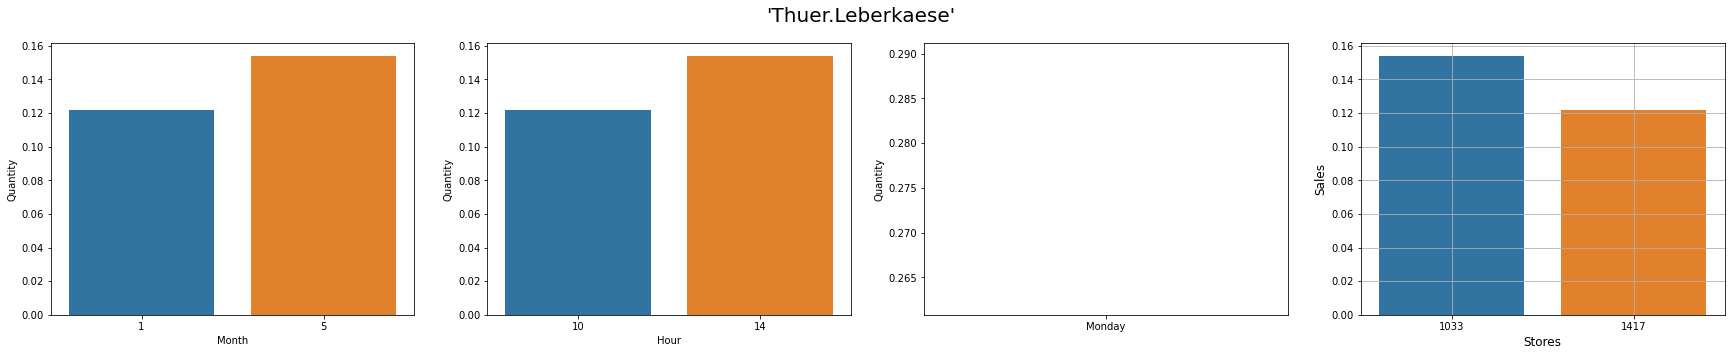

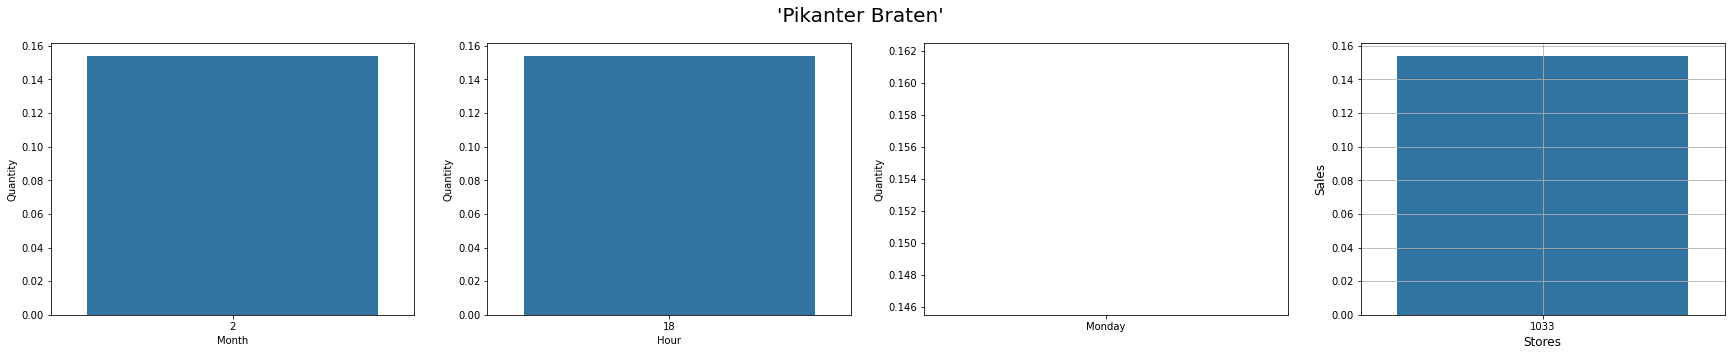

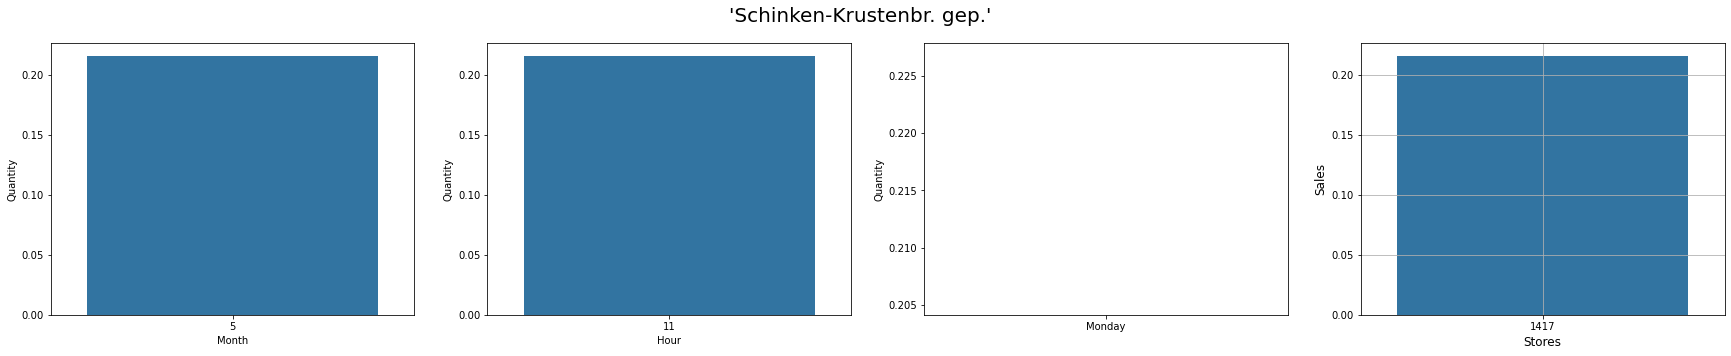

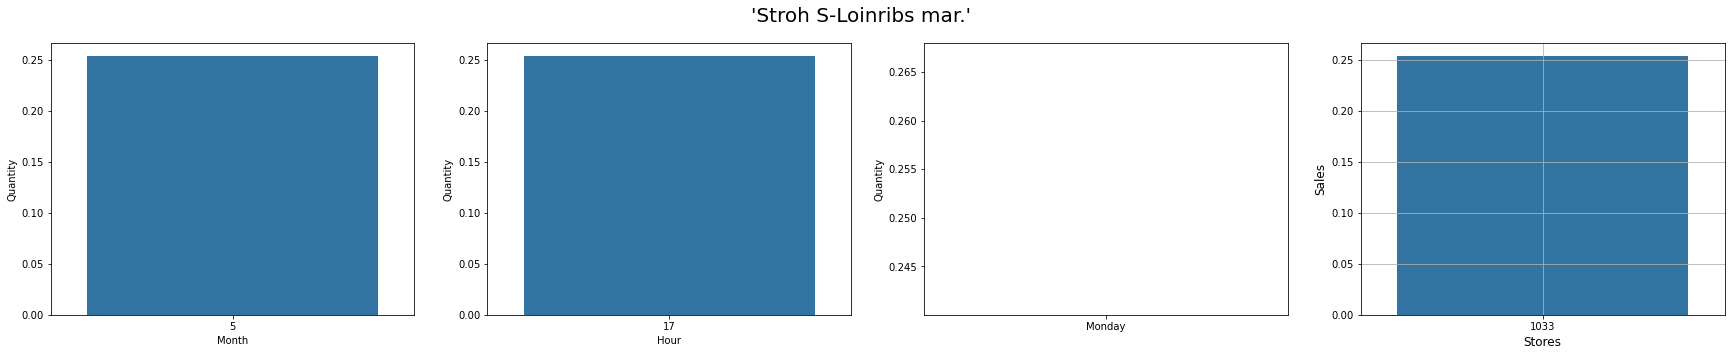

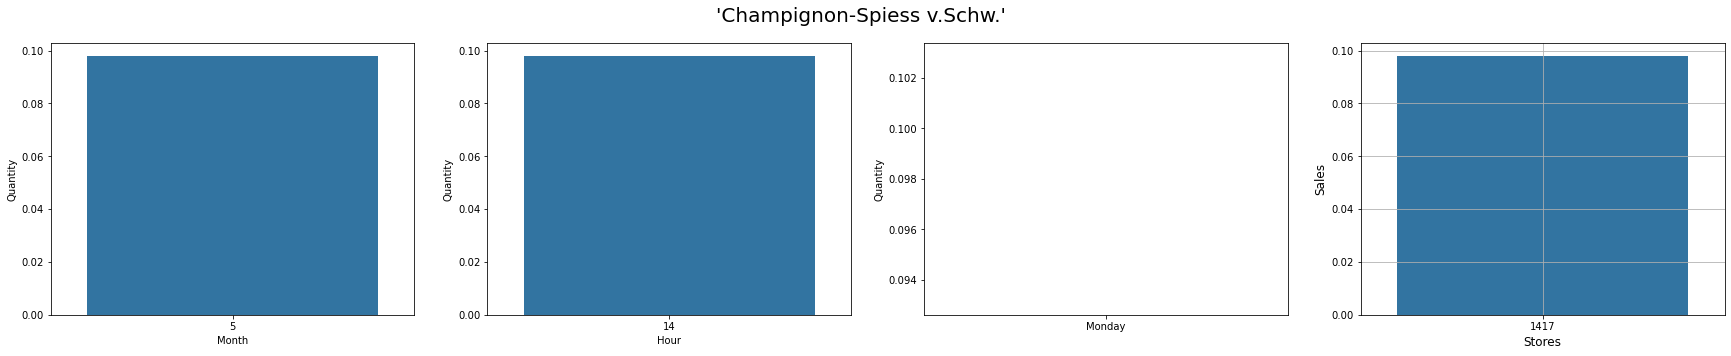

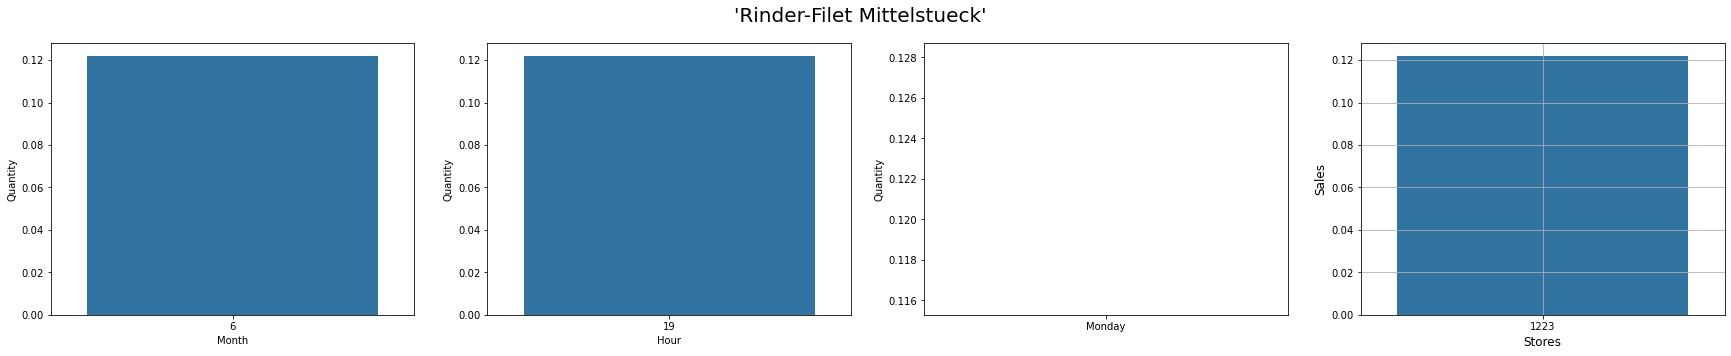

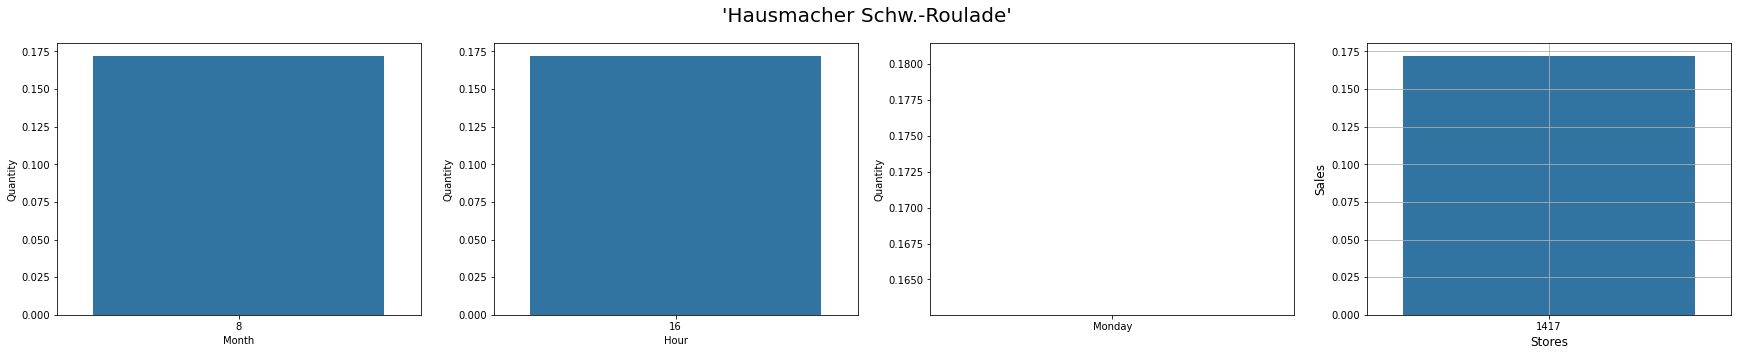

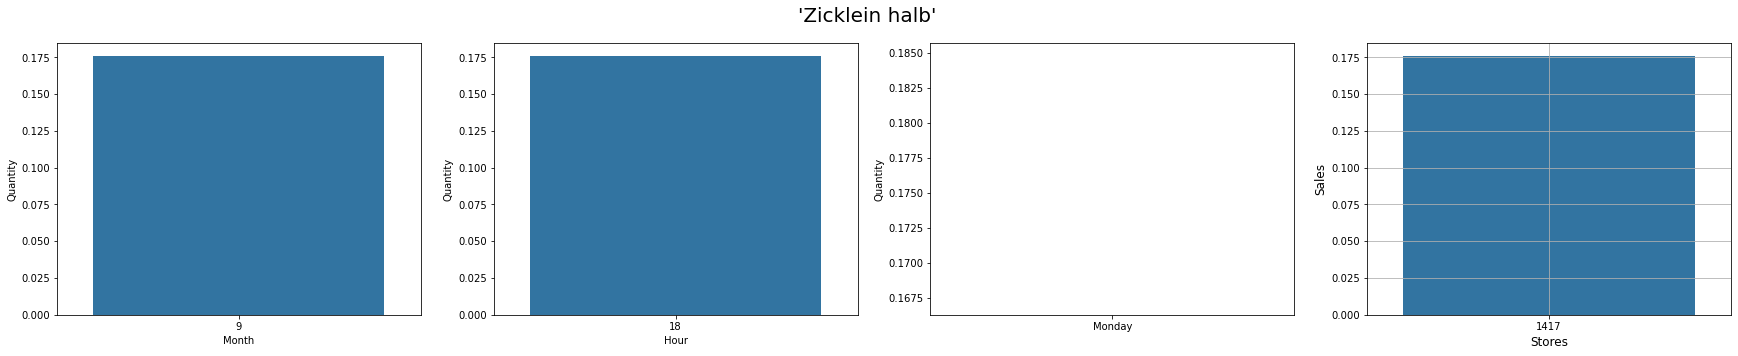

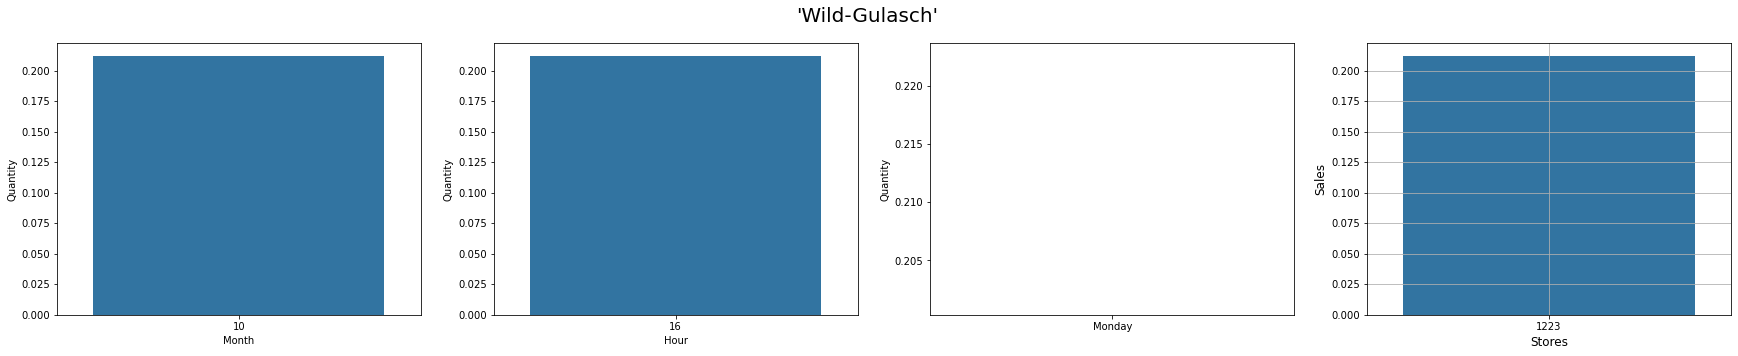

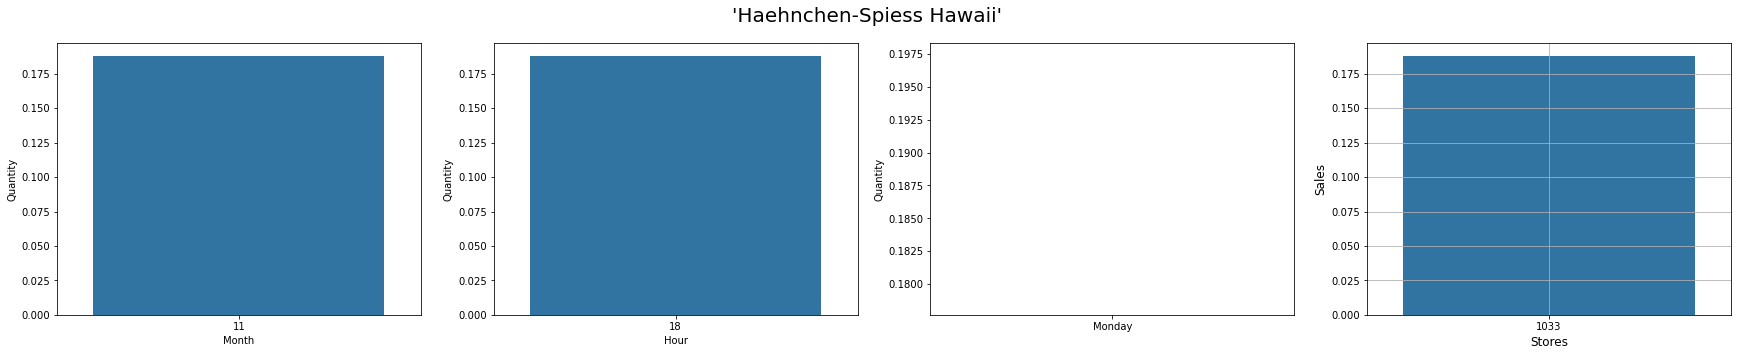

In [4]:
for article_name in list(df['ArticleName'].unique()):
    article = df[df['ArticleName'] == article_name].reset_index()
    fig, ax = plt.subplots(1,4, figsize=(30,5))
    plt.suptitle(f"'{article_name}'", fontsize=20)
    # Monthly sales
    monthly_sales = article.groupby('Month').sum()
    sns.barplot(
        y=monthly_sales['Quantity'],
        x=monthly_sales.index,
        data=monthly_sales,
        ax=ax[0])
    plt.ylabel("Sales", fontsize=12)
    plt.xlabel('Months', fontsize=12)
    # Hourly sales
    hourly_sales = article.groupby('Hour').sum()
    sns.barplot(
        ax=ax[1],
        y=hourly_sales['Quantity'],
        x=hourly_sales.index,
        data=hourly_sales)
    plt.ylabel("Sales", fontsize=12)
    plt.xlabel('Hours', fontsize=12)
    plt.grid(True)
    # Daily sales
    daily_sales = article.groupby('Day').sum()
    while daily_sales.shape[0] <= 6:
        daily_sales = daily_sales.append(pd.Series(), ignore_index=True)
    daily_sales.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.lineplot(
        ax=ax[2],
        y=daily_sales['Quantity'],
        x=daily_sales.index,
        data=daily_sales)
    plt.ylabel("Sales", fontsize=12)
    plt.xlabel('Day of week', fontsize=12)
    plt.grid(True)
    # maximum sales by Store
    store_sales = article.groupby('StoreNumber').sum()
    sns.barplot(
        ax=ax[3],
        y=store_sales['Quantity'],
        x=store_sales.index,
        data=store_sales)
    plt.ylabel("Sales", fontsize=12)
    plt.xlabel('Stores', fontsize=12)
    plt.grid(True)
